In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math
import copy
from itertools import permutations
from matplotlib.animation import FuncAnimation
import pickle

In [2]:
class Vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, other):
        d = np.sqrt((other.x - self.x)**2 + (other.y - self.y)**2)
        #print(f"The distance from {self} to {other} is {d}")
        return d

    def __repr__(self):
        return f"({self.x},{self.y})"

    def __getitem__(self, index):
        x = self.x
        y = self.y
        return x, y

In [3]:
# This Will be the Graph Class for the implementation of the
# Traveling Salesman Problem
class Graph:
    def __init__(self):
        self.nodes = []
        self.edges = []

    def add_node(self, node):
        if(node in self.nodes):
            return "You are adding a node that already exists you nerd."
        else:
            self.nodes.append(node)

            
    def add_edge(self, one, two):
        if((one, two) in self.edges):
            return "That edge already exists"
        else:
            self.edges.append((one, two, one.distance(two)))

    def __repr__(self):
        return f"Graph has nodes: {self.nodes} \nGraph has edges: {self.edges}"

    def plot(self):
        plt.plot(
            [self.nodes[i].x for i in range(0, len(self.nodes))],
            [self.nodes[i].y for i in range(0, len(self.nodes))],
            "bo")
        for i in range(0, len(self.edges)):
            plt.plot([self.edges[i][j].x for j in range(0,2)], 
                      [self.edges[i][j].y for j in range(0,2)],
                    color = "k")
        plt.savefig('test.png')
        plt.rcParams['figure.figsize'] = [15, 10]
        plt.show()
    def get_total_distance(self):
        total = 0
        for i in range(0,len(self.edges)):
            total += self.edges[i][2]
        return total

In [4]:
def describe_tour(g, start):
    temp_graph = copy.deepcopy(g)
    tour = []
    for i in range(start, len(temp_graph.nodes) + start):
        if(i >= len(g.nodes)):
            tour.append(temp_graph.nodes[np.abs(len(temp_graph.nodes) - i)])
        else:
            tour.append(g.nodes[i])
    #print(tour)
    for i in range(0, len(tour)):
        if (i == len(tour) - 1):
            temp_graph.add_edge(tour[i], tour[0])
        else:
            temp_graph.add_edge(tour[i], tour[i+1])
        
    min_distance = temp_graph.get_total_distance() + temp_graph.edges[start][2]
    """
    for i in range(0, len(tour)):
        if(i == len(tour) - 1):
            print(f"{tour[i]} -> {tour[0]} \n")
        else:
            print(f"{tour[i]} -> ", end='')
    """
    temp_graph.plot()
    return temp_graph

In [5]:
def get_distance(nodes):
        total = 0
        for i in range(0,len(nodes)):
            total += nodes[i - 1].distance(nodes[i])
        return total

In [6]:
def bf(nodes):
    min_length = get_distance(nodes)
    min_path = nodes
    
    for path in permutations(nodes):
        length = get_distance(path)
        if length < min_length:
            min_length = length
            min_path = path
    return min_path

In [7]:
def anneal(nodes):
    initial_temp = 20
    final_temp = .1
    alpha = .2
    
    current_temp = initial_temp
    current_state = nodes
    solution = current_state
    while(current_temp > final_temp):
        neighbor = np.random.permutation(current_state)
        cost = get_distance(current_state) - get_distance(neighbor)
        if(np.random.uniform(0,1) < np.exp(cost/current_temp)):
            solution = neighbor
        current_temp -= alpha
    return solution

In [142]:
verts = []
for i in range(1, 15):
    temp = Vertex(rand.randint(0,50), rand.randint(0,50))
    verts.append(temp)

graph = Graph()
for i in range(0,len(verts)):
    graph.add_node(verts[i])


In [12]:
max_iter = 1
anneal_sol = list(anneal(graph.nodes))
min_sol = anneal_sol
min_dist = get_distance(anneal_sol)
for i in range(max_iter):
    #print(i)
    temp_sol = list(anneal(graph.nodes))
    temp_min = get_distance(temp_sol)
    if(temp_min < min_dist):
        min_dist = temp_min
        min_sol= temp_sol
    
min_dist

328.4288061444976

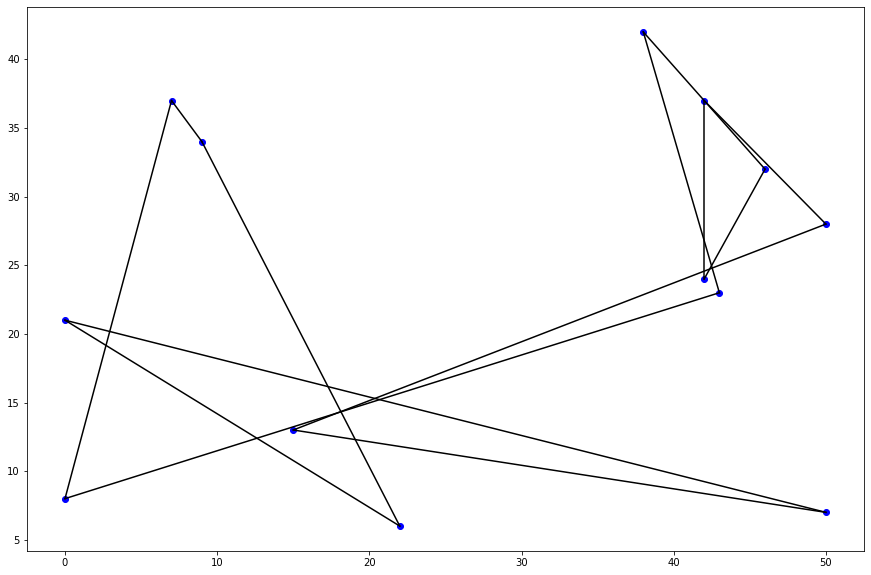

328.4288061444976


In [13]:
anneal_it_sol_graph = Graph()
for i in range(0,len(min_sol)):
    anneal_it_sol_graph.add_node(min_sol[i])
#print(anneal_it_sol_graph)
anneal_it_graph = describe_tour(anneal_it_sol_graph, 0)
print(anneal_it_graph.get_total_distance())

In [145]:
solution = bf(graph.nodes)
solution = list(solution)
sol_graph = Graph()
for i in range(0,len(solution)):
    sol_graph.add_node(solution[i])
print(sol_graph)
graph1 = describe_tour(sol_graph, 0)
print(graph1.get_total_distance())

KeyboardInterrupt: 

In [11]:
verts = []
for i in range(1, 14):
    temp = Vertex(rand.randint(0,50), rand.randint(0,50))
    verts.append(temp)

graph = Graph()
for i in range(0,len(verts)):
    graph.add_node(verts[i])
with open("test.txt", "wb") as fp:   #Pickling
    pickle.dump(verts, fp)